**IMPORTING LIBRARIES**

In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 2.csv
/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 4.csv
/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv


> IMPORTING DATASET

In [108]:
dset=pd.read_csv('/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 4.csv');dset


,Order Number,Order Status,Book Name,Order Date,City (Billing)
0,70978,Completed,Column Nigari Kese Sekhain,1/20/2021 17:43,Swat
1,70962,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 13:37,Karachi
2,70960,Completed,Justju ka safar-1/Waqfa e Pareshani,1/20/2021 10:48,Karachi
3,70959,Completed,R ka Taaruf,1/20/2021 10:32,Karachi
4,70958,Completed,انٹرنیٹ سے پیسہ کمائیں,1/20/2021 10:29,Karachi
...,...,...,...,...,...
19182,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi
19183,310,Returned,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi
19184,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad
19185,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi


>  EXPLORING DATA (CHECKING NULL VALUES)

In [109]:
dset.head()
print(dset.columns)
columns = dset.columns.str.replace(' ','_').str.lower()
columns = columns.str.replace('[(,)]', '')
dset.columns = columns
print(dset.shape)
dset.info()
print(dset.isnull().sum())
dset.book_name=dset.book_name.fillna(dset.book_name.mode()[0])
dset.city_billing=dset.city_billing.fillna(dset.city_billing.mode()[0])
print(dset.isnull().sum())
dset.book_name = dset.book_name.str.split('/')
print(dset.book_name)

Index(['Order Number', 'Order Status', 'Book Name', 'Order Date',
       'City (Billing)'],
      dtype='object')
(19187, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19187 entries, 0 to 19186
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_number  19187 non-null  int64 
 1   order_status  19187 non-null  object
 2   book_name     19185 non-null  object
 3   order_date    19187 non-null  object
 4   city_billing  19186 non-null  object
dtypes: int64(1), object(4)
memory usage: 749.6+ KB
order_number    0
order_status    0
book_name       2
order_date      0
city_billing    1
dtype: int64
order_number    0
order_status    0
book_name       0
order_date      0
city_billing    0
dtype: int64
0                             [Column Nigari Kese Sekhain]
1                                 [انٹرنیٹ سے پیسہ کمائیں]
2                   [Justju ka safar-1, Waqfa e Pareshani]
3                                     

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


> Data Exploratory Analysis

['Completed' 'Returned' 'Canceled']


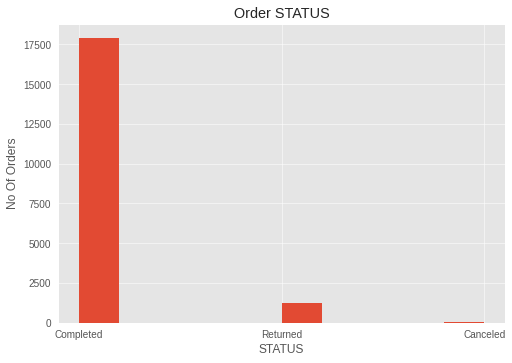

In [132]:
ord_sts=dset.order_status.unique()
print(ord_sts)
plt.style.use('ggplot')
plt.title('Order STATUS')
plt.xlabel('STATUS')
plt.ylabel('No Of Orders')
plt.hist(dset.order_status)
plt.show()

> MOST CITES

<AxesSubplot:ylabel='city_billing'>

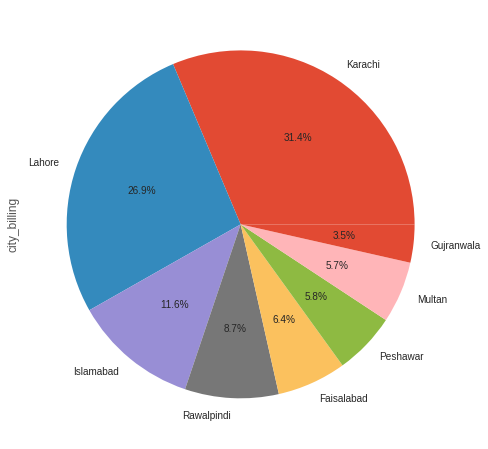

In [147]:
most_cities = dset['city_billing'].value_counts()
most_cities = most_cities.iloc[:8]
most_cities.plot(kind='pie',figsize=(8,8),autopct='%1.1f%%')


> > BEST SELLING BOOK

In [154]:
deliever = dset[dset['order_status'] == 'Completed']

array(['Completed'], dtype=object)

**TOP 15 SELLING BOOKS**

In [156]:
best_selling_book = deliever['book_name'].value_counts().to_frame()
best_selling_book.iloc[:15]

,book_name
[انٹرنیٹ سے پیسہ کمائیں],2183
[Python Programming],1433
[Product Management],1009
"[Blockchain, Cryptocurrency And Bitcoin]",954
[Justju ka safar-1],873
